<img src = 'image/Netflixprompts.jpg' width = 4000 height = 500>

# **Analyzing Netflix Data**
***
## **Business Problem**<br>
To understand current audience content preference pattern w.r.t type of content consumed over the years, genres consumed, etc. Also, to get a fair understanding of the recommender system on Netflix

## **Stakeholder**<br>
Content Producer<br>
Director

## **Data Science Problem**

  - Understanding what content is available in different countries
  - Determeine whether Netflix has increasingly focusing on TV rather than movies in recent years.
  - Identifying similar content by matching text-based features



In [2]:
import os
from os.path import dirname, abspath
import pandas as pd
import numpy as np
import re
import collections as c
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from nltk.corpus import stopwords

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Importing Plotly Library and necessary Packages
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.subplots import make_subplots

# Import cufflinks
import cufflinks as cf

In [4]:
# Work on the graphs offline
cf.go_offline(connected=True)
py.init_notebook_mode(connected=True)

%matplotlib inline

In [5]:
root_dir = dirname(abspath('.'))
data_dir = os.path.join(root_dir,'Netflix')
data_dir = os.path.join(data_dir,'data')
netflix_file = os.path.join(data_dir,'netflix_titles.csv')

In [6]:
df = pd.read_csv(netflix_file)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


# Basic Data Check
***

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


There are missing values in columns of director, cast, country, date_added & rating. Let's fill the missing rows

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Filling missing values
df['rating'] = df['rating'].fillna("")
df['director'] = df['director'].fillna("")

In [10]:
#Converting 'date_added' to date time format
df['date_added'] = pd.to_datetime(df['date_added'])

#Creating new feature 'year_added' from 'date_added'
df['year_added'] = df['date_added'].dt.year

In [11]:
df.describe()

,show_id,release_year,year_added
count,6.234000e+03,6234.00000,6223.000000
mean,7.670368e+07,2013.35932,2017.983288
std,1.094296e+07,8.81162,1.204851
min,2.477470e+05,1925.00000,2008.000000
25%,8.003580e+07,2013.00000,2017.000000
50%,8.016337e+07,2016.00000,2018.000000
75%,8.024489e+07,2018.00000,2019.000000
max,8.123573e+07,2020.00000,2020.000000




# **EDA**


## Type of Content

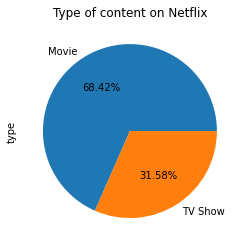

In [12]:
content_type = df['type'].value_counts()
# print(content_type)
content_type.plot.pie(autopct = '%.2f%%')
plt.title('Type of content on Netflix')
plt.show()

**Insights :**
Netflix have more movies than TV Shows

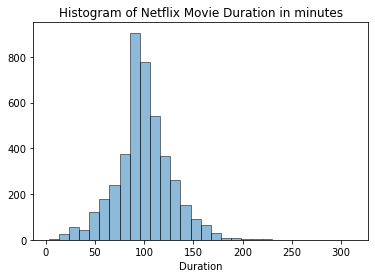

In [13]:
#Getting subsets of data for visualization
# subset = pd.DataFrame(df, columns=['show_id', 'title', 'type', 'duration', 'rating'])
movie_subset = df[df['type']=='Movie']
tv_subset = df[df['type']== 'TV Show']

# for the movie_subset, remove 'min' from the column duration 
## identify the frequency 
## create a histogram and buckets for heatmap
movie_subset['Duration_min'] = movie_subset['duration'].str.rstrip('min').astype('int')

movie_subset.hist(column = 'Duration_min', grid = False, bins = 30, alpha = 0.5, edgecolor = 'black')
plt.title("Histogram of Netflix Movie Duration in minutes")
plt.xlabel('Duration')
plt.show()

## **Heatmap**

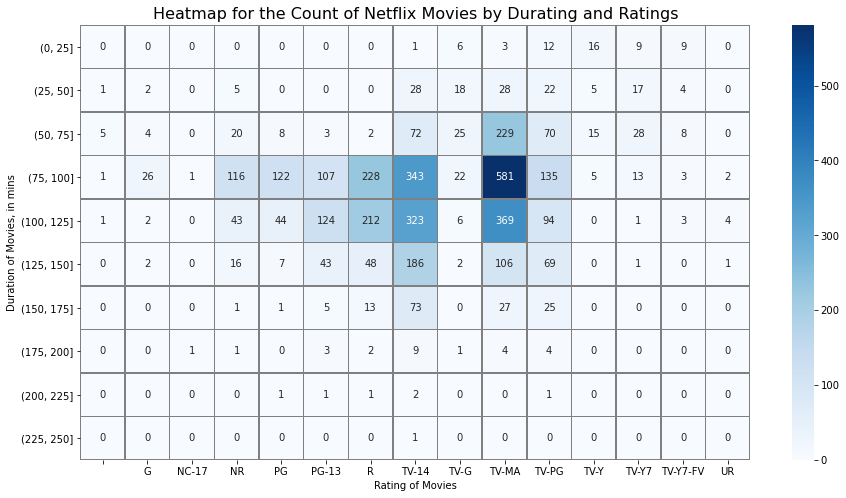

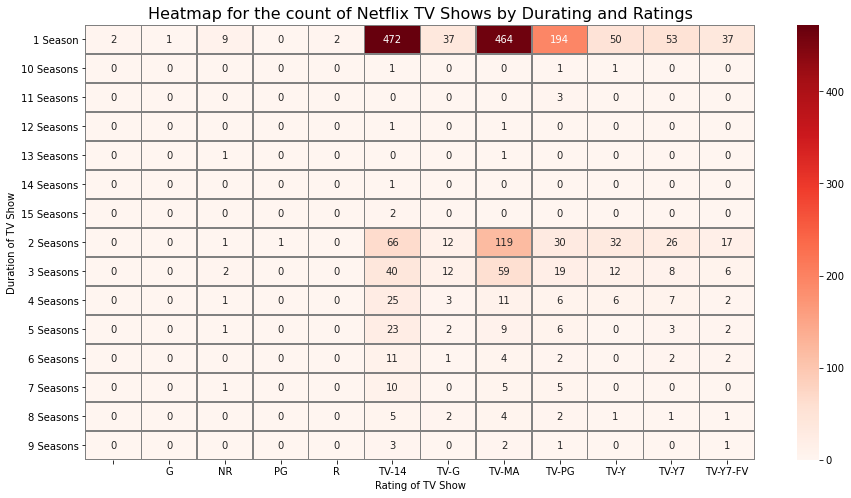

In [14]:
## Creating bins for Duration_min
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
movie_subset['binned'] = pd.cut(movie_subset['Duration_min'], bins)

#Keep necessary data for pivot
tv_subset_sub = tv_subset[['show_id', 'duration', 'rating']]
movie_subset_sub = movie_subset[['show_id', 'binned', 'rating']]

#Creating pivot table for heatmaps
tv_pivot = pd.pivot_table(tv_subset_sub, index = ['duration'], columns = ['rating'], aggfunc='count', fill_value=0)
movie_pivot = pd.pivot_table(movie_subset_sub, index=['binned'], columns = ['rating'], aggfunc ='count', fill_value=0)

# Identifying all the cols and indexes needed for the new df for heatmap 
tv_cols = list(tv_pivot.columns.get_level_values(level=1))
tv_index = list(tv_pivot.index.get_level_values(level=0))

movie_cols = list(movie_pivot.columns.get_level_values(level=1))
movie_index = list(movie_pivot.index.get_level_values(level=0))

#creates the df in preparation for the heatmaps 
tv_output = pd.DataFrame(tv_pivot.values, index=tv_index, columns=tv_cols)
movie_output = pd.DataFrame(movie_pivot.values, index=movie_index, columns=movie_cols)

## Heatmaps

## --- Movies ---

plt.figure(figsize=(15,8))
sns.heatmap(movie_output, cmap = 'Blues', linewidths= 0.5, annot = True, annot_kws={'fontsize':10}, fmt = 'g', linecolor='gray')
plt.yticks(rotation=0)
plt.ylabel('Duration of Movies, in mins')
plt.xlabel('Rating of Movies')
plt.title('Heatmap for the Count of Netflix Movies by Durating and Ratings',fontsize=16)
plt.show()

# --- TV Shows --- 
plt.figure(figsize = (15,8))
sns.heatmap(tv_output,cmap='Reds', linewidths=0.5, annot=True, annot_kws={"fontsize":10}, fmt='g',linecolor='gray')
plt.yticks(rotation=0)
plt.ylabel('Duration of TV Show')
plt.xlabel('Rating of TV Show')
plt.title('Heatmap for the count of Netflix TV Shows by Durating and Ratings',fontsize=16)
plt.show()

**Movies**<br>
Ratings with TV-14 & TV-MA have more number of content with duration range 50 to 150 minutes

**TV Show**<br>
Most of the TV Show have only 1 season
TV-14 & TV-MA ratings have more number of content

- **TV-MA: MATURE AUDIENCE ONLY**<br>
   This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. This program contains one or more of the following: graphic violence (V), explicit sexual activity (S), or crude indecent language (L)
   

   - **TV-14: PARENTS STRONGLY CAUTIONED**<br>
   This program contains some material that parents would find unsuitable for children under 14 years of age. Parents are strongly urged to exercise greater care in monitoring this program and are cautioned against letting children under the age of 14 watch unattended. This program contains one or more of the following: intense violence (V), intense sexual situations (S), strong coarse language (L), or intensely suggestive dialogue (D)

## Number of programs based on Ratings

In [15]:
df_rating = df['rating'].value_counts().reset_index()
df_rating.head()

,index,rating
0,TV-MA,2027
1,TV-14,1698
2,TV-PG,701
3,R,508
4,PG-13,286


In [16]:
# Plotting the data on bar graph
trace1 = go.Bar(x=df_rating['index'], y=df_rating['rating'], marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",
                   title = 'Ratings of Programmes on Netflix', 
                   xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

**Insight :** Content with rating 'TV-MA' (Mature Audience Only) is the highest followed closely by 'TV-14' (Parents Strongly Cautioned).
We can assume that most viewers are above 18 years of age

## Ratings vs Content Type

In [17]:
#New Dataframe
movie_rating = movie_subset['rating'].value_counts().reset_index()
tv_rating = tv_subset['rating'].value_counts().reset_index()

In [18]:
# Creating traces
trace1 = go.Bar(x=tv_rating['index'], y=tv_rating['rating'], name="TV Shows")

trace2 = go.Bar(x=movie_rating['index'], y=movie_rating['rating'], name="Movies")

In [19]:
# Creating Layout
layout = go.Layout(template= "plotly_dark",
                   title = 'Rating by Content Type', 
                   xaxis = dict(title = 'Rating'), 
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

**Insights :** Movies with TV-MA have highest content followed by TV-14. TV Shows around have almost same count of TV-MA & TV-14.

**Recommendations :** Try to target audience with movies or TV Shows content which have ratings TV-MA & TV-14

## What type of content added over the years?

In [20]:
#Drop rows with Null values in 'date_added'
df.drop(index = df[df['date_added'].isna()].index, axis = 0, inplace = True)

# Converting 'year_added' from float to int
df['year_added'] = df['year_added'].astype("int")

# Checking the values in 'year_added' column
df['year_added'].head()

0    2019
1    2016
2    2018
3    2018
4    2017
Name: year_added, dtype: int32

In [21]:
movie_subset = df[df['type']=='Movie']
tv_subset = df[df['type']== 'TV Show']

In [22]:
# Creating a table to get the count of TV Shows added each year
vc1 = tv_subset['year_added'].value_counts().reset_index()
vc1 = vc1.rename(columns = {'year_added': "count", "index":'year_added'})
vc1['percent'] = vc1['count'].apply(lambda x:100*x/sum(vc1['count']))
vc1 = vc1.sort_values('year_added')
vc1.head()

,year_added,count,percent
9,2008,1,0.051046
8,2012,3,0.153139
7,2013,6,0.306279
6,2014,6,0.306279
5,2015,32,1.633486


In [23]:
# Creating a table to get the count of Movies added each year
vc2 = movie_subset['year_added'].value_counts().reset_index()
vc2 = vc2.rename(columns = {'year_added': "count", "index":'year_added'})
vc2['percent'] = vc2['count'].apply(lambda x:100*x/sum(vc2['count']))
vc2 = vc2.sort_values('year_added')
vc2.head()

,year_added,count,percent
12,2008,1,0.023452
10,2009,2,0.046904
11,2010,1,0.023452
7,2011,13,0.304878
9,2012,4,0.093809


In [24]:
# Creating traces
trace1 = go.Scatter(x=vc1['year_added'], 
                    y=vc1['count'], 
                    name="TV Shows", 
                    marker=dict(color='rgb(249, 6, 6)', 
                                 line=dict(color='rgb(0, 0, 0)', 
                                 width=1.5)))
trace2 = go.Scatter(x=vc2['year_added'], 
                    y=vc2['count'], 
                    name="Movies", 
                    marker=dict(color='rgb(26, 118, 255)', 
                                 line=dict(color='rgb(0, 0, 0)', 
                                 width=1.5)))

In [25]:
# Plotting the graphs
layout = go.Layout(hovermode='closest', 
                   title="Content Added over the Years", 
                   xaxis=dict(title="Year"), 
                   yaxis=dict(title="Count"), 
                   template="plotly_dark")
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

**Insights :**
From 2015, there has been a steep rise in the licensing of movies as compared to TV shows. We also observe that there is 63.21% rise in TV Show in year 2019 whereas 19.84% increase in movies count.<br>
There is drop in year 2020 might be due to less release of TV Shows & movies due to COVID pandemic

## Most Popular Genre on Netflix

In [26]:
top_genre = c.Counter((','.join(df['listed_in'])).split(',')).most_common(20)
genre = [val[0] for val in top_genre][::-1]
count = [val[1] for val in top_genre][::-1]

trace = go.Bar(y=genre, x = count, name ='', orientation ='h')

layout = go.Layout(title = 'Top genres on Netflix',
                  template = 'plotly_dark',
                  xaxis = dict(title = 'Count'),
                  yaxis = dict(title = 'Genre'))
fig = go.Figure(data =[trace], layout = layout)
fig.show()

Let's also identify the top content by countries to see if there're any difference in the preference of viewers  by countries.

In [27]:
def df_by_country(data, country):
    '''
    Returns a specific df with shows avaiable to specific country
    Input : A Dataframe & selected country name
    Output : A dictionary with country as key & show_id as value
    '''
    drop_country_na = data[data['country'].notna()]
    return drop_country_na[drop_country_na['country'].str.contains(country)]

In [28]:
def top_genre_by_country(data, country):
    genre_counter = c.Counter(','.join(df_by_country(df,country)['listed_in']).split(',')).most_common(5)
    genre = [val[0] for val in genre_counter][::-1]
    count = [val[1] for val in genre_counter][::-1]
    return genre, count

fig = make_subplots(rows =3, cols = 2, horizontal_spacing = 0.4,
                   subplot_titles = ('USA', 'France', 'Japan','South Korea', 'India'))
country = ['United States', 'France', 'Japan', 'South Korea','India']
colors = ['#AF7AC5', '#76D7C4', '#EC7063', '#F4D03F','#AF7AC5']
position = [(1,1), (1,2), (2,1), (2,2),(3,1)]

for i in np.arange(len(country)):
    genre, count = top_genre_by_country(df, country[i])
    fig.add_trace(go.Bar(y = genre, x = count,
                        orientation ='h', name = '',
                        marker = dict(color= colors[i])), position[i][0], position[i][1])
    
    fig.update_layout(showlegend=False, title_text = 'Top 5 Genres by Country')
    
fig.show()

**Insights :** 
From the barplots above, the top 5 genre of Netflix shows vary from country to country, which may reflect the difference in the tastes of audience. For example, American, Indian and French viewers on Netflix may favor `Drama` and `Comedies` over `Anime` series compared to Japanese viewers, whereas viewers in South Korea favor Korean TV shows the most.

In addition to that, we also want to take a look at the language of shows on Netflix by looking at the what genres they are listed in. We found that there're two tags particularly referencing to the language of the shows: Spanish-Language TV Shows and Korean TV Shows.

The pie chart below shows that the primary language of most of the content on Netflix are English, **10.1% are Korean** and **8.9% are Spanish**.


In [29]:
netflix_spanish = sum(df['listed_in'].str.contains('Spanish'))
netflix_korean = sum(df['listed_in'].str.contains('Korean'))
netflix_english = len(df) - netflix_spanish - netflix_korean

labels = ['Spanish','Korean','English']
values = [netflix_spanish, netflix_korean, 1053, 500]
colors = ['#F5B041 ', '#73C6B6', '#5DADE2']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(marker=dict(colors=colors), hoverinfo = 'skip')
fig.update_layout(title_text ='Percentage of Netflix content in English, Korean and Spanish',)
fig.show()

## Content released over year

In [30]:
releaseyr_df = df['release_year'].value_counts().reset_index()
releaseyr_df

,index,release_year
0,2018,1062
1,2017,959
2,2019,843
3,2016,828
4,2015,515
...,...,...
67,1959,1
68,1963,1
69,1964,1
70,1956,1


In [31]:
# Create trace
trace = go.Bar(x=releaseyr_df['index'],
              y = releaseyr_df.release_year,
              marker = dict(color='rgb(255,165,0)', line=dict(color='rgb(0,0,0)', width=1.5)))

In [32]:
# Create layout
layout = go.Layout(template='plotly_dark',
                  title='Content Released over the Year',
                  xaxis=dict(title='Rating'),
                  yaxis=dict(title='Count'))

fig = go.Figure(data=[trace], layout=layout)
fig.show()

## Content release year for different Type of Content

In [33]:
releaseyr_df_movie = movie_subset['release_year'].value_counts().reset_index()
releaseye_df_tv = tv_subset['release_year'].value_counts().reset_index()

# Create trace for Movie
trace1 = go.Bar(
                x = releaseyr_df_movie['index'],
                y = releaseyr_df_movie['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# Create trace for TV Show
trace2 = go.Bar(
                x = releaseye_df_tv['index'],
                y = releaseye_df_tv['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'Content Released over the Years by Content Type' ,
                   xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

# Content-based recommendation on Netflix shows



One of Netflix's core business is to offer personalized recommendations of shows to the audience. This article here explains how Netflix's recommendation system works on a very high level and lists a number of factors that Netflix uses to develop their recommendation system.

   - **Viewers-level factors:** Viewing history, rating of other shows given by the viewers, the time of day they interact with Netflix, duration of each active session, what device they use to watch shows on and other Netflix viewers with similar tastes and preferences.

   - **Text-based features of the shows:** Content, genre, categories, actors, release year.

Apparently, the dataset does not include any views-level factors so we will mainly focus on the text-based features to build our recommendation system. The goal here is to recommend 5 shows based on a list of shows that the audience has already watched previously, using the following features:<br>
   - Director
   - Description
   - listed in
   - rating


## Feature Engineering


In this section, we first create a variable `aggregated_text`, which is the concatenation of the four variables: `director` + `description` + `listed in` + `rating`. Then we lowercase each word in our corpus. remove punctuations and English stopwords.


In [34]:
df_netflix = df[df['title'].notna()]
df_netflix['aggregated_text'] = df_netflix['description'].str.lower()+ ' ' + df_netflix['listed_in'].str.lower()+' '+df_netflix['rating'].str.lower()+' '+df_netflix['director'].str.lower()
corpus_tokenized = list(df_netflix['aggregated_text'].str.split(' '))
stopwords_list = set(stopwords.words('english'))
index = list(range(0, len(corpus_tokenized)))
clean_corpus =[]

for sentence in corpus_tokenized:
    s =[]
    for word in sentence:
        clean_word = re.sub(r'[^\w\s]','',word)
        if clean_word not in stopwords_list:
            s.append(clean_word)
        clean_corpus.append(' '.join(s))
        


## TF-IDF vectorizer

We use TF-IDF vectorizer which stands for Term Frequency-Inverse Document Frequency, to vectorize our corpus by turning the raw text into a matrix of TF-IDF features. The reason why I choose TF-IDF vectorizer over CountVectorizer is because word counts do not take words frequency across documents into account. For instance, some words like "man" might appear many times in the description of a lot of shows and their large counts will not be very meaningful in the encoded vectors.

   - **Term Frequency:** This summarizes how often a given word appears within a document.

   - **Inverse Document Frequency:** This downscales words that appear a lot across documents.

We use cosine similarity as our metric to measure the degree of similarity between two shows in terms of their text-based features: content, rating, genres and directors. The larger the cosine similarity is, the closer the vector representation of their text-based features are.


In [35]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
tfidf_vectorizer = TfidfVectorizer().fit_transform(clean_corpus)

In [37]:
def get_recommendation(show_list, vectorizer):
  '''
  Returns: 
        A df showing the top 5 similar show and genres of a given list of shows 
  Input: 
        Show_name: A list of shows that the user has already watched
        Vectorizer: Type of vectorizer 
  '''
  title, scores, genre = [], [], []
  for show_name in show_list:
    show_index = df_netflix[df_netflix['title'] == show_name].index[0]
    cosine_similarities = linear_kernel(vectorizer[show_index], vectorizer).flatten()
    similar_show_index = cosine_similarities.argsort()[:-7:-1][1:]
    title += [df_netflix['title'][i] for i in similar_show_index]
    genre += [df_netflix['listed_in'][i] for i in similar_show_index]
#     director += [df_netflix['director'][i] for i in similar_show_index]
    scores += list(cosine_similarities[similar_show_index])

  df = pd.DataFrame(data = {'Title': title, 
                            'Genre': genre,
#                             'Director' : director,
                            'Cosine_similarity': scores})

  df = df[~df['Title'].isin(show_list)].sort_values('Cosine_similarity', ascending = False)
  df['Title'] = df['Title'].drop_duplicates()
  top_seven_list = df[df['Title'].notna()].iloc[0:7, :]
    
  return top_seven_list

Let's take a look at an example. Knowing that I have watched three TV shows on Netflix: Stranger Things, The Vampire Diaries, Sense8, what are the 5 shows that Netflix will recommend to me?

### **TF-IDF Vectorizer with unigram**

In [39]:
watched_shows = ['Zindagi Na Milegi Dobara','I Lost My Body']
get_recommendation(watched_shows, tfidf_vectorizer)

,Title,Genre,Cosine_similarity
5,Kalushi: The Story of Solomon Mahlangu,"Dramas, International Movies",1.000000
7,Atlantics,"Dramas, Independent Movies, International Movies",0.927989
8,Crazy people,"Comedies, International Movies, Thrillers",0.927989
9,Payday,"Comedies, Independent Movies, International Mo...",0.895991
0,Emogenius,Reality TV,0.808740
1,Anjaan: Rural Myths,"International TV Shows, TV Horror, TV Thrillers",0.808740
2,F.R.E.D.I.,"Children & Family Movies, Sci-Fi & Fantasy",0.653384




Next, we want to look at how the vectorizer performs when use **unigram, bigram and trigram** instead of only unigram. An n-gram is a sequence of N words: a 2-gram (or bigram) is a two-word sequence of words like “please turn”, “turn your”, or ”your homework”, and a 3-gram (or trigram) is a three-word sequence of words like “please turn your”, or “turn your homework”

As we increase the context size, we observe that the cosine similarity decreases but the Genre become more similar or nearly identical to the Genre of the given list of shows.


### **TF-IDF Vectorizer with unigram, bigram and trigram**

In [40]:
tfidf_vectorizer_ngram = TfidfVectorizer(ngram_range = (1, 3)).fit_transform(clean_corpus)
get_recommendation(watched_shows, tfidf_vectorizer_ngram)

,Title,Genre,Cosine_similarity
5,Kalushi: The Story of Solomon Mahlangu,"Dramas, International Movies",1.000000
7,Payday,"Comedies, Independent Movies, International Mo...",0.897826
8,Sugar Rush Christmas,Reality TV,0.897826
9,Atlantics,"Dramas, Independent Movies, International Movies",0.894683
0,Emogenius,Reality TV,0.676193
1,Anjaan: Rural Myths,"International TV Shows, TV Horror, TV Thrillers",0.676193
2,F.R.E.D.I.,"Children & Family Movies, Sci-Fi & Fantasy",0.531000
